In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "../../../")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "../../../tmp"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_sgd = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_momentum = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Momentum.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_nag = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.NAG.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adagrad = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.AdaGrad.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adam = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: 6V5MXK6I
Multi Layer Network Model - ID: ALY27SXX
Multi Layer Network Model - ID: GP2H0UIP
Multi Layer Network Model - ID: QZAQDZL6
Multi Layer Network Model - ID: FJKC708B


In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
batch_size = 1000
max_epoch = 100

neural_networks = {"SGD": n_sgd, "Momentum": n_momentum, "Nesterov": n_nag, "AdaGrad": n_adagrad, "Adam": n_adam}
#neural_networks = {"AdaGrad": n_adagrad, "Adam": n_adam}

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=1, 
        is_numba=False, 
        verbose=False
    )

***SGD***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.306846 - Validation Error: 2.314437 - Test Accuracy: 0.156900
Epoch   1 Completed - Train Error: 0.389607 - Validation Error: 0.399634 - Test Accuracy: 0.888600
Epoch   2 Completed - Train Error: 0.249986 - Validation Error: 0.263046 - Test Accuracy: 0.923200
Epoch   3 Completed - Train Error: 0.194380 - Validation Error: 0.213477 - Test Accuracy: 0.934700
Epoch   4 Completed - Train Error: 0.224053 - Validation Error: 0.182714 - Test Accuracy: 0.942500
Epoch   5 Completed - Train Error: 0.187172 - Validation Error: 0.161194 - Test Accuracy: 0.949100
Epoch   6 Completed - Train Error: 0.151178 - Validation Error: 0.145592 - Test Accuracy: 0.954200
Epoch   7 Completed - Train Error: 0.158857 - Validation Error: 0.133819 - Test Accuracy: 0.956700
Epoch   8 Completed - Train Error: 0.102206 - Validation Error: 0.124371 - Test Accuracy: 0.960500
Epoch   9 Completed - Train Error: 0.133860 - Validation Error: 0.116943 - T

Epoch  83 Completed - Train Error: 0.003214 - Validation Error: 0.084611 - Test Accuracy: 0.978800
Epoch  84 Completed - Train Error: 0.004037 - Validation Error: 0.084900 - Test Accuracy: 0.978800
Epoch  85 Completed - Train Error: 0.003658 - Validation Error: 0.085154 - Test Accuracy: 0.978700
Epoch  86 Completed - Train Error: 0.002941 - Validation Error: 0.085403 - Test Accuracy: 0.978900
Epoch  87 Completed - Train Error: 0.003386 - Validation Error: 0.085648 - Test Accuracy: 0.978900
Epoch  88 Completed - Train Error: 0.002458 - Validation Error: 0.085823 - Test Accuracy: 0.978900
Epoch  89 Completed - Train Error: 0.002506 - Validation Error: 0.086149 - Test Accuracy: 0.978900
Epoch  90 Completed - Train Error: 0.004492 - Validation Error: 0.086308 - Test Accuracy: 0.978900
Epoch  91 Completed - Train Error: 0.002459 - Validation Error: 0.086486 - Test Accuracy: 0.978900
Epoch  92 Completed - Train Error: 0.002474 - Validation Error: 0.086782 - Test Accuracy: 0.979000
Epoch  93 

Epoch  65 Completed - Train Error: 0.000043 - Validation Error: 0.156587 - Test Accuracy: 0.978700
Epoch  66 Completed - Train Error: 0.000067 - Validation Error: 0.156869 - Test Accuracy: 0.978800
Epoch  67 Completed - Train Error: 0.000066 - Validation Error: 0.157178 - Test Accuracy: 0.978800
Epoch  68 Completed - Train Error: 0.000102 - Validation Error: 0.157407 - Test Accuracy: 0.978800
Epoch  69 Completed - Train Error: 0.000061 - Validation Error: 0.157686 - Test Accuracy: 0.978800
Epoch  70 Completed - Train Error: 0.000049 - Validation Error: 0.157938 - Test Accuracy: 0.978800
Epoch  71 Completed - Train Error: 0.000092 - Validation Error: 0.158204 - Test Accuracy: 0.978800
Epoch  72 Completed - Train Error: 0.000057 - Validation Error: 0.158428 - Test Accuracy: 0.978800
Epoch  73 Completed - Train Error: 0.000060 - Validation Error: 0.158661 - Test Accuracy: 0.978800
Epoch  74 Completed - Train Error: 0.000036 - Validation Error: 0.158887 - Test Accuracy: 0.978800
Epoch  75 

Epoch  47 Completed - Train Error: 0.005967 - Validation Error: 0.186430 - Test Accuracy: 0.970300
Epoch  48 Completed - Train Error: 0.004109 - Validation Error: 0.178852 - Test Accuracy: 0.975100
Epoch  49 Completed - Train Error: 0.010835 - Validation Error: 0.182031 - Test Accuracy: 0.974000
Epoch  50 Completed - Train Error: 0.004123 - Validation Error: 0.182296 - Test Accuracy: 0.975400
Epoch  51 Completed - Train Error: 0.001535 - Validation Error: 0.181802 - Test Accuracy: 0.974500
Epoch  52 Completed - Train Error: 0.000900 - Validation Error: 0.191377 - Test Accuracy: 0.975700
Epoch  53 Completed - Train Error: 0.001344 - Validation Error: 0.180756 - Test Accuracy: 0.976600
Epoch  54 Completed - Train Error: 0.000731 - Validation Error: 0.182736 - Test Accuracy: 0.976100
Epoch  55 Completed - Train Error: 0.002166 - Validation Error: 0.193882 - Test Accuracy: 0.975600
Epoch  56 Completed - Train Error: 0.000515 - Validation Error: 0.190973 - Test Accuracy: 0.975400
Epoch  57 

Epoch  29 Completed - Train Error: 0.014865 - Validation Error: 0.098241 - Test Accuracy: 0.971900
Epoch  30 Completed - Train Error: 0.010587 - Validation Error: 0.098702 - Test Accuracy: 0.971400
Epoch  31 Completed - Train Error: 0.007982 - Validation Error: 0.099944 - Test Accuracy: 0.971400
Epoch  32 Completed - Train Error: 0.008887 - Validation Error: 0.100286 - Test Accuracy: 0.971500
Epoch  33 Completed - Train Error: 0.009382 - Validation Error: 0.101531 - Test Accuracy: 0.971500
Epoch  34 Completed - Train Error: 0.007010 - Validation Error: 0.101846 - Test Accuracy: 0.970900
Epoch  35 Completed - Train Error: 0.008138 - Validation Error: 0.102897 - Test Accuracy: 0.971400
Epoch  36 Completed - Train Error: 0.007957 - Validation Error: 0.103888 - Test Accuracy: 0.971500
Epoch  37 Completed - Train Error: 0.008097 - Validation Error: 0.104921 - Test Accuracy: 0.971700
Epoch  38 Completed - Train Error: 0.007224 - Validation Error: 0.105285 - Test Accuracy: 0.971700
Epoch  39 

Epoch  11 Completed - Train Error: 0.181615 - Validation Error: 0.238657 - Test Accuracy: 0.937200
Epoch  12 Completed - Train Error: 0.213900 - Validation Error: 0.240631 - Test Accuracy: 0.936600
Epoch  13 Completed - Train Error: 0.135596 - Validation Error: 0.248686 - Test Accuracy: 0.939400
Epoch  14 Completed - Train Error: 0.141494 - Validation Error: 0.241593 - Test Accuracy: 0.936300
Epoch  15 Completed - Train Error: 0.185023 - Validation Error: 0.222802 - Test Accuracy: 0.939300
Epoch  16 Completed - Train Error: 0.239591 - Validation Error: 0.249534 - Test Accuracy: 0.939300
Epoch  17 Completed - Train Error: 0.139741 - Validation Error: 0.228339 - Test Accuracy: 0.943000
Epoch  18 Completed - Train Error: 0.184552 - Validation Error: 0.225963 - Test Accuracy: 0.939900
Epoch  19 Completed - Train Error: 0.202027 - Validation Error: 0.245097 - Test Accuracy: 0.941300
Epoch  20 Completed - Train Error: 0.125110 - Validation Error: 0.261560 - Test Accuracy: 0.936300
Epoch  21 

../../../tensorflux/functions.py:49: RuntimeWarning: invalid value encountered in true_divide
  y = np.exp(x) / np.sum(np.exp(x), axis=0)
../../../tensorflux/layers.py:99: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (u_value <= 0.0)


Epoch  83 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  84 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  85 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  86 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  87 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  88 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  89 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  90 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  91 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  92 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  93 Completed - Train Er

In [5]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error: {:7.5f}, Min ValidationError: {:7.5f}, Max Test Accuracy: {:7.5f}".format(
        key, 
        neural_networks[key].min_validation_error_epoch,
        neural_networks[key].min_train_error,
        neural_networks[key].min_validation_error,
        neural_networks[key].max_test_accuracy,
        )
    )

TypeError: unsupported format string passed to NoneType.__format__

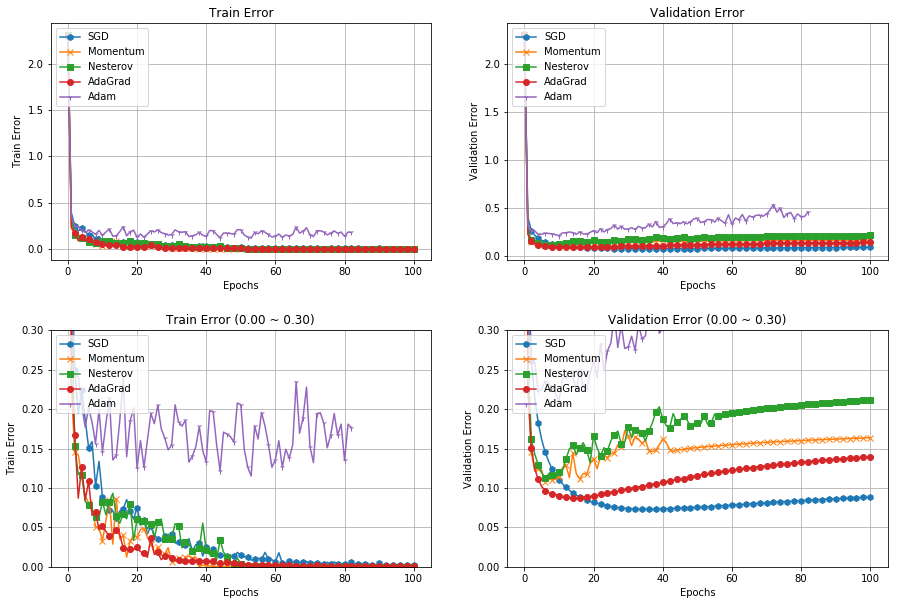

In [6]:
markers = {"SGD": "h", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "Adam": "1"}
epoch_list = np.arange(max_epoch + 1)

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


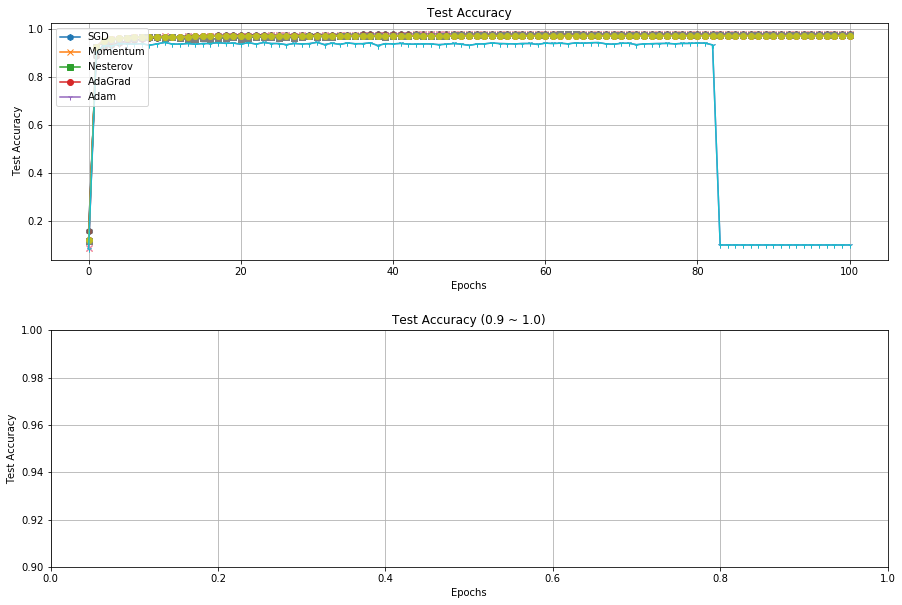

In [7]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.9, 1.0)
axarr[1].set_title('Test Accuracy (0.9 ~ 1.0)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()